#차원과 차원 축소
##차원
특성의 개수
##차원 축소
데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법     
비지도 학습 작업중 하나임
##주성분 분석
데이터에 있는 분산이 큰 방향을 찾는 것



*   분산이 큰 방향이란 데이터를 잘 표현하는 어떤 벡터라고 생각할 수 있음
*   이 벡터를 ***주성분***이라고 함
*    2차원의 특성에서 1개의 벡터로 샘플 데이터를 줄일 수 있음
*   주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다.

첫번째 주성분을 찾는다면 다음으로 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다. 이 벡터가 두번째 주성분이다. 두번째 주성분의 방향은 하나뿐이다.


*   일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있다.








---
#PCA 클래스
PCA 클래스를 사용하여 주성분 분석 알고리즘을 사용할 수 있다.


In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy     ##데이터 전처리
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-08-16 12:58:22--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-08-16 12:58:22--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-08-16 12:58:23--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

n_components 매개변수로 주성분의 개수를 지정해야 한다. 또한 비지도 학습이므로 fit() 메소드에 타깃값을 제공하지 않는다.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)  ##주성분의 개수 : 50개
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
print(pca.components_.shape)    ##배열의 크기 확인

(50, 10000)


pca.components_ 배열의 첫번재 차원이 50이다. 50개의 주성분을 찾은 것이다.    
원본 데이터와 차원이 같으므로 주성분을 100*100 크기의 이미지처럼 출력할 수 있다.

In [9]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):             ##draw_fruits : 3차원 배열을 입력받아 가로로 10개씩 이미지를 출력하는 함수
  n = len(arr)     ##n : 샘플의 수
  rows = int(np.ceil(n/10))          ##전체 행 개수 계산

  cols = n if rows < 2 else 10     ##행이 2개보다 작다면 열의 개수는 샘플의 개수이고 기렇지 않다면 10개이다.
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j<n:
          axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

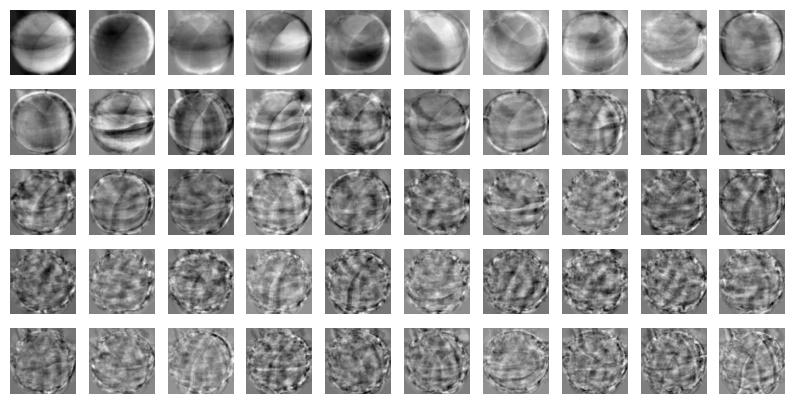

In [10]:
draw_fruits(pca.components_.reshape(-1,100,100))

이 주성분은 원본 데이터에서 가장 분사닝 큰 방향을 순서대로 나타낸 것이다.    
주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있다. PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄여본다.

In [12]:
print(fruits_2d.shape)

(300, 10000)


In [13]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


(300,10000)의 배열을 PCA 모델을 사용해 (300,50)의 크기로 바꾸었다. fruits_pca 배열은 50개의 특성을 가진 데이터이다.

##원본 데이터 재구성
특성을 줄임에 따라 손실이 발생할 수 밖에 없다. 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 상당 부분 재구성할 수 있다.     
PCA 클래스에서 inverse_transform() 메서드를 통해 특성을 복원할 수 있다.

In [14]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


이 데이터를 다시 출력해본다.

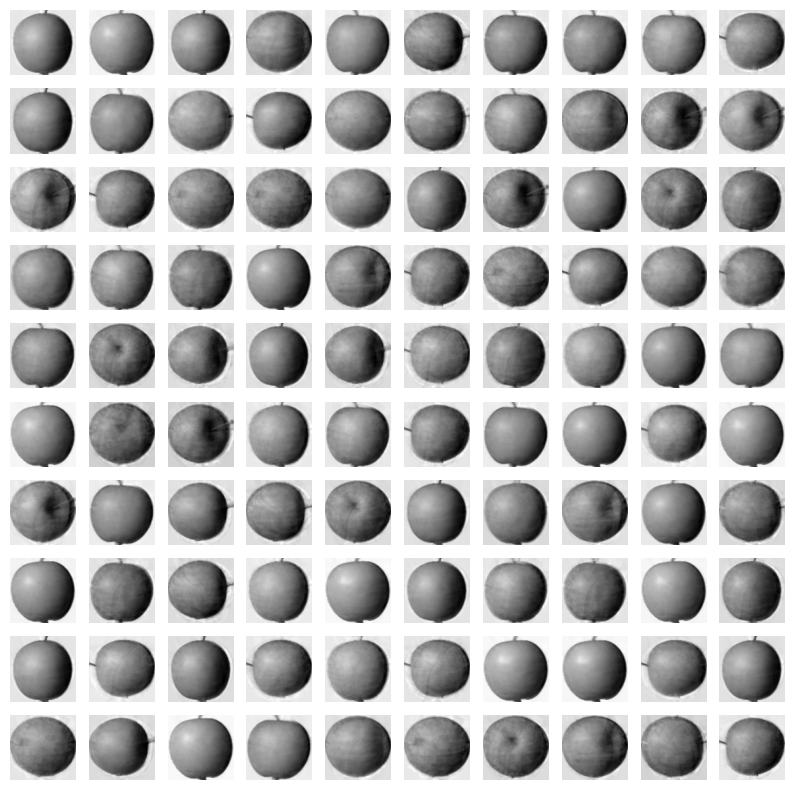

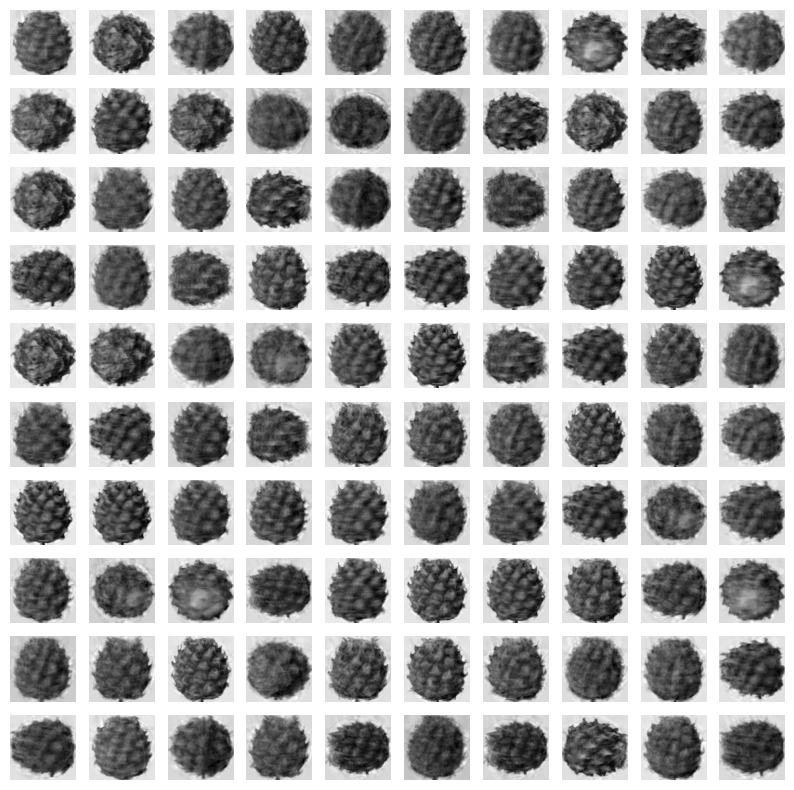

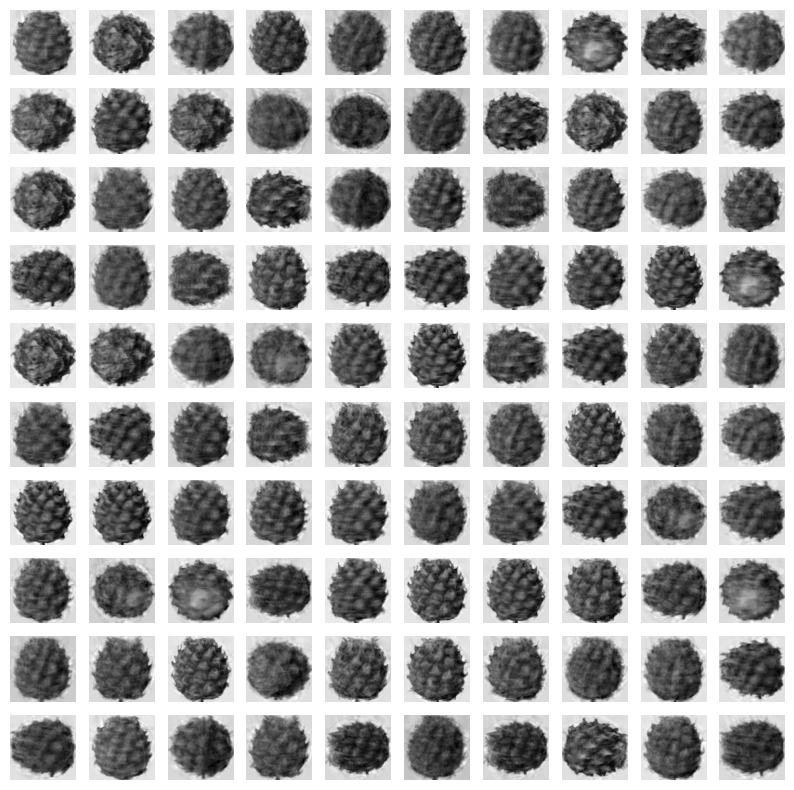

In [15]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,100]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

거의 모든 과일 사진을 잘 복원할 수 있다.

#설명된 분산
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 ***설명된 분산***이라고 한다.

PCA 클래스의 explained_variance_ratio_ 에 각 주성분의 설명된 분산 비율이 기록되어 있다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있다.

In [17]:
print(np.sum(pca.explained_variance_ratio_))    ##50개의 주성분으로 표현하고 있는 총 분산 비율

0.9215538232066012


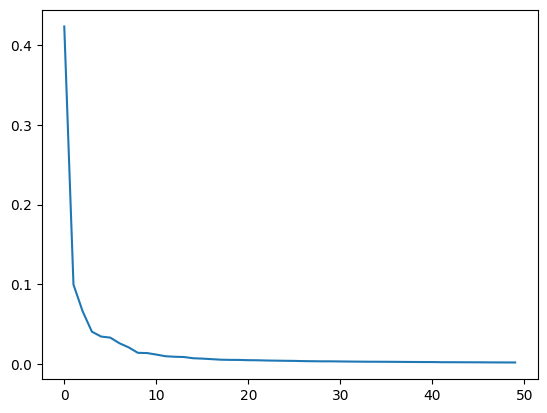

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

그래프를 보았을 때 처음 10개의 주성분이 대부분의 분산을 표현하고 있다.

#다른 알고리즘과 함께 사용하기
PCA로 축소한 데이터를 지도학습에 적용해본다.

먼저 간다히 로지스틱 회귀 모델을 사용해본다.

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

다음으로 타깃값을 지정한다. 사과 ; 0, 파인애플 : 1, 바나나 : 2로 지정한다.

In [22]:
target = np.array([0]*100+[1]*100+[2]*100)

fruits_2d를 사용해 로지스틱 회귀 모델에 적용한다. cross_validate() 메서드로 교차 검증을 수행한다.

In [23]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.8195184230804444


교차 검증의 점수는 매우 높게 나온다. 특성이 10000개나 되기 때문에 300개의 샘플에서는 금방 과대적합된 모델을 만들기 쉽다.

In [25]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.043631124496459964


50개의 특성을 사용했음에도 정솩도가 100%이고 훈련 시간이 매우 감소함을 알 수 있다. PCA 클래스를 사용할 때 n_components 매개변수에 주 성분의 개수를 지정했는데 그 대신 원하는 분산의 비율을 입력할 수도 있다.

In [27]:
pca = PCA(n_components=0.5)   ##분산의 비율을 절반으로 지정
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [28]:
print(pca.n_components_)

2


특성의 개수가 단 2개로 출력되었다. 2개의 특성만으로 분산의 50%를 표현할 수 있다. 이 모델로 원본 데이터를 변환시켜본다.

In [30]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [31]:
scores = cross_validate(lr, fruits_pca, target)     ##반복 횟수를 증가시키라는 경고 발생함
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9933333333333334
0.056741952896118164


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


경고가 발생하지만 99%의 정확도를 달성했다.

##k-평균 알고리즘으로 클러스터 찾아보기

In [33]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


클러스터는 각각 110개, 99개, 91개의 샘플을 포함할 수 있다. 이렇다면 이미지를 출력해본다.

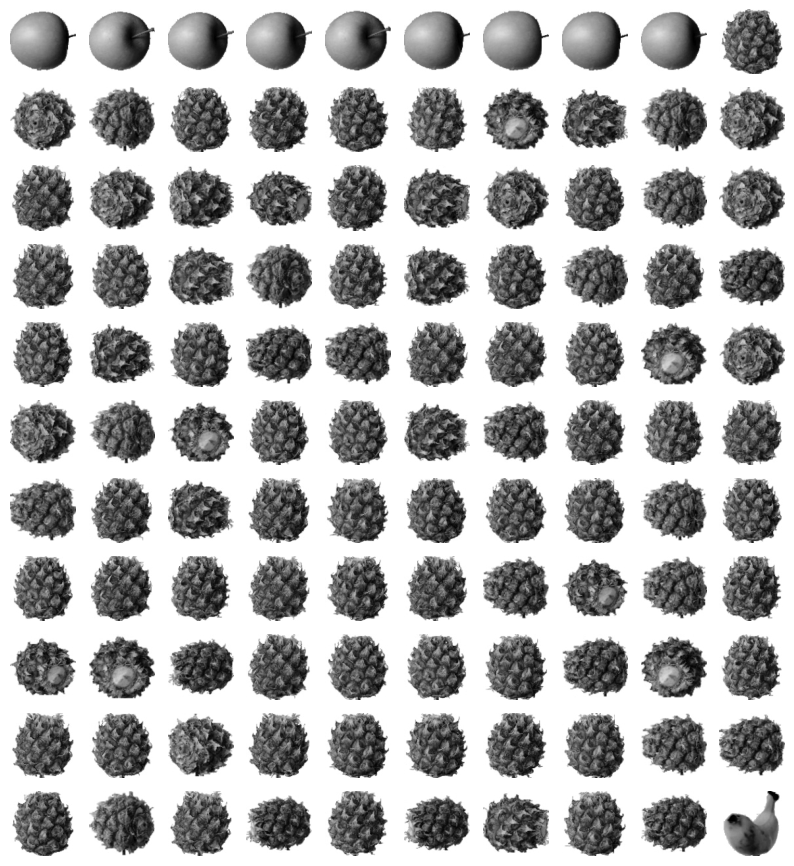

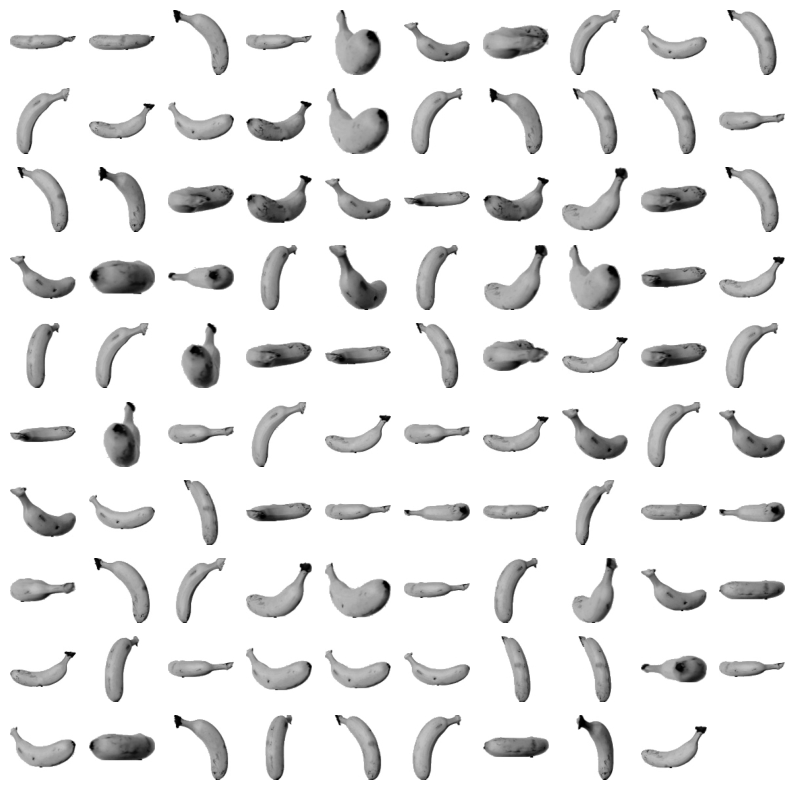

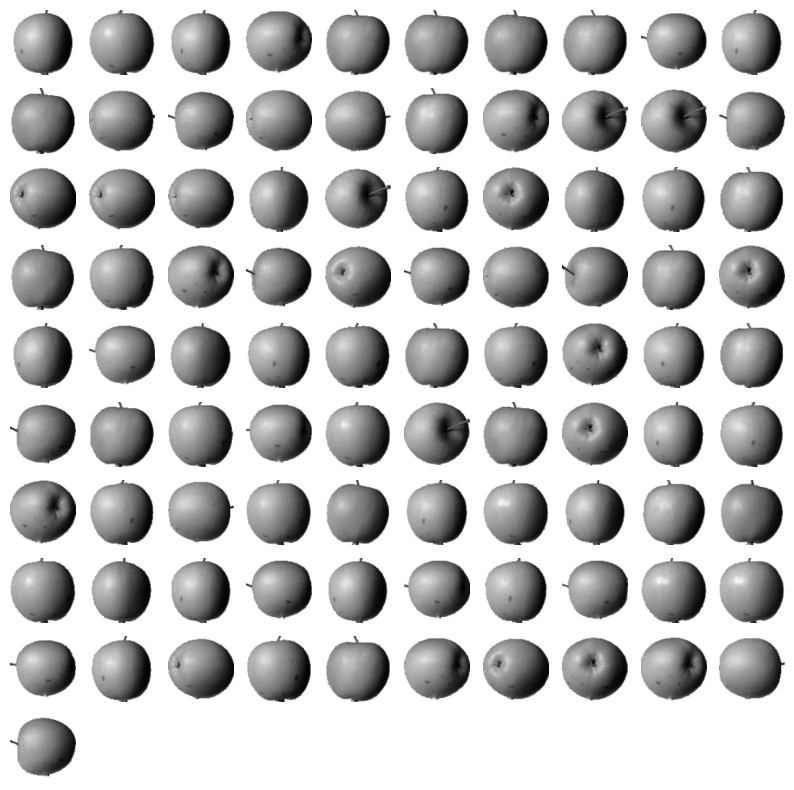

In [34]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

훈련 데이터를 줄여도 원본 데이터를 이용했을 때와 비슷한 결과를 얻을 수 있다.

##데이터의 시각화
훈련 데이터의 차원을 줄이면 시각화라는 장점 또한 얻을 수 있다. 3개 이하로 차원을 줄이면 화면에 출력하기 쉽기 때문이다. km.labels_를 사용해 클러스터 별로 나누어 산범도를 그려본다.

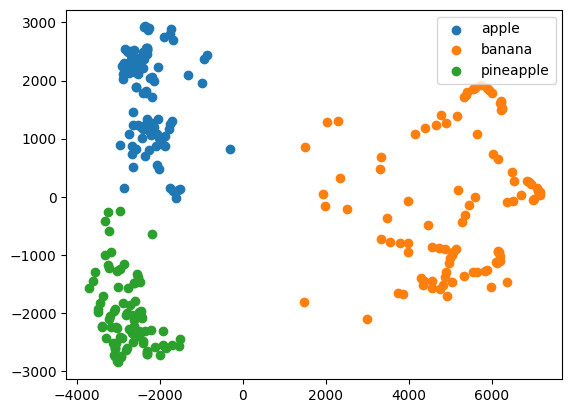

In [37]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

각 클러스터의 산번도가 아주 잘 구분되었다. 2개의 특성만을 사용했는데 로지스틱 회귀 모델의 교차 검증이 높은 이유를 알 수 있다.    